In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_log_error,make_scorer


Download Dataset

In [ ]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003
7256,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764
7257,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694
7258,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712


In [ ]:
train_df.dtypes

Id                    int64
Date                 object
Hour                  int64
Temperature         float64
Humidity              int64
Wind_Speed          float64
Visibility            int64
Dew_Point           float64
Solar_Radiation     float64
Rainfall            float64
Snowfall            float64
Season               object
IsHoliday             int64
IsFunctioningDay      int64
Bikes_Rented          int64
dtype: object

In [ ]:
train_df.drop("Date",inplace=True,axis=1)
train_df.drop("Id",inplace=True,axis=1)
train_df.dtypes

Hour                  int64
Temperature         float64
Humidity              int64
Wind_Speed          float64
Visibility            int64
Dew_Point           float64
Solar_Radiation     float64
Rainfall            float64
Snowfall            float64
Season               object
IsHoliday             int64
IsFunctioningDay      int64
Bikes_Rented          int64
dtype: object

Rename Predicted Column with y

In [ ]:
train_df.rename(columns={'Bikes_Rented':'y'},inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              7260 non-null   int64  
 1   Temperature       7260 non-null   float64
 2   Humidity          7260 non-null   int64  
 3   Wind_Speed        7260 non-null   float64
 4   Visibility        7260 non-null   int64  
 5   Dew_Point         7260 non-null   float64
 6   Solar_Radiation   7260 non-null   float64
 7   Rainfall          7260 non-null   float64
 8   Snowfall          7260 non-null   float64
 9   Season            7260 non-null   object 
 10  IsHoliday         7260 non-null   int64  
 11  IsFunctioningDay  7260 non-null   int64  
 12  y                 7260 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 737.5+ KB


In [ ]:
train_df.isna().sum()

Hour                0
Temperature         0
Humidity            0
Wind_Speed          0
Visibility          0
Dew_Point           0
Solar_Radiation     0
Rainfall            0
Snowfall            0
Season              0
IsHoliday           0
IsFunctioningDay    0
y                   0
dtype: int64

Count duplicated Rows

In [ ]:
train_df.duplicated().sum()

0

If you want to extract duplicated rows 

In [ ]:
train_df[train_df.duplicated()]

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,y


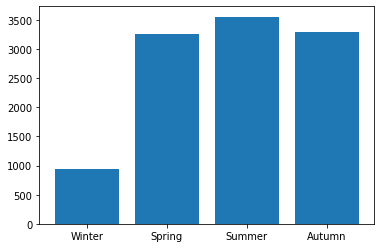

In [ ]:
plt.bar(train_df['Season'],train_df['y'])
plt.show()

<BarContainer object of 4 artists>

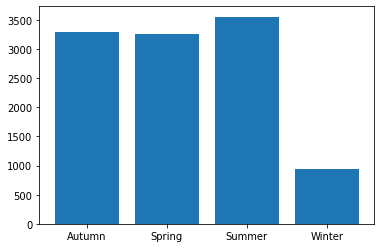

In [ ]:
plt.bar(train_df.groupby('Season').max()['y'].index,train_df.groupby('Season').max()['y'])

([<matplotlib.axis.XTick at 0x7fe402f46f50>,
 <a list of 24 Text major ticklabel objects>)

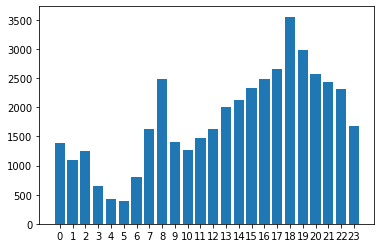

In [ ]:
plt.bar(train_df['Hour'],train_df['y'])
plt.xticks(range(24))

Let's check outliers existance using box plots 

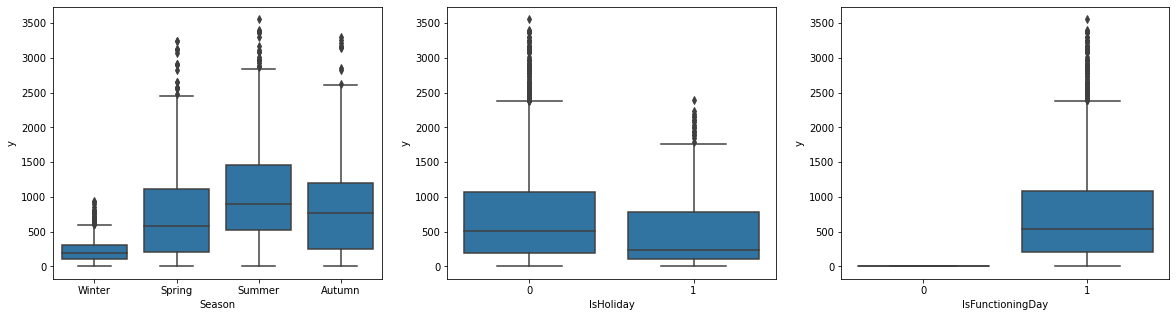

In [ ]:
plt.figure(figsize=[20,5])
base_color=sns.color_palette()[0]

# plt seasons vs y 
plt.subplot(1,3,1)
sns.boxplot(data=train_df, x='Season', y='y', color=base_color)
# train_df.boxplot(column=train_df.columns.tolist(),by=['Season'])

# plt IsHoliday vs y 
plt.subplot(1,3,2)
sns.boxplot(data=train_df, x='IsHoliday', y='y', color=base_color)

# plt IsFunctioningDay vs y 
plt.subplot(1,3,3)
sns.boxplot(data=train_df, x='IsFunctioningDay', y='y', color=base_color)

Hour                0.412558
Temperature         0.542721
Humidity           -0.196400
Wind_Speed          0.111693
Visibility          0.192391
Dew_Point           0.387701
Solar_Radiation     0.261868
Rainfall           -0.120431
Snowfall           -0.143341
IsHoliday          -0.067563
IsFunctioningDay    0.200254
y                   1.000000
Name: y, dtype: float64


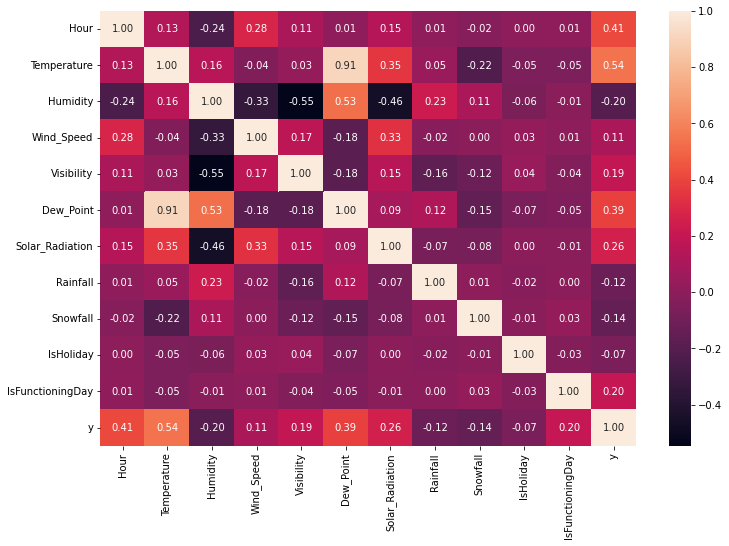

In [ ]:
plt.figure(figsize=[12,8])
print(train_df.corr()['y'])
sns.heatmap(train_df.corr(),annot=True,fmt='0.2f')